In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [5]:
df=pd.read_csv('Airline_Delay_Cause.csv')

In [6]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [8]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

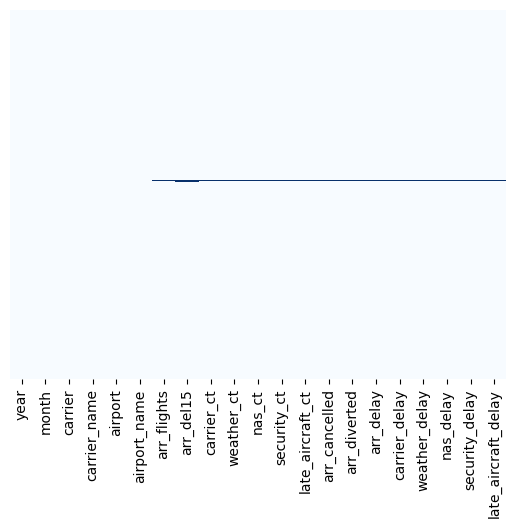

In [9]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [10]:
df = df[df['arr_del15'].notnull()]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178747 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 178747 non-null  int64  
 1   month                178747 non-null  int64  
 2   carrier              178747 non-null  object 
 3   carrier_name         178747 non-null  object 
 4   airport              178747 non-null  object 
 5   airport_name         178747 non-null  object 
 6   arr_flights          178747 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178747 non-null  float64
 9   weather_ct           178747 non-null  float64
 10  nas_ct               178747 non-null  float64
 11  security_ct          178747 non-null  float64
 12  late_aircraft_ct     178747 non-null  float64
 13  arr_cancelled        178747 non-null  float64
 14  arr_diverted         178747 non-null  float64
 15  arr_delay            1

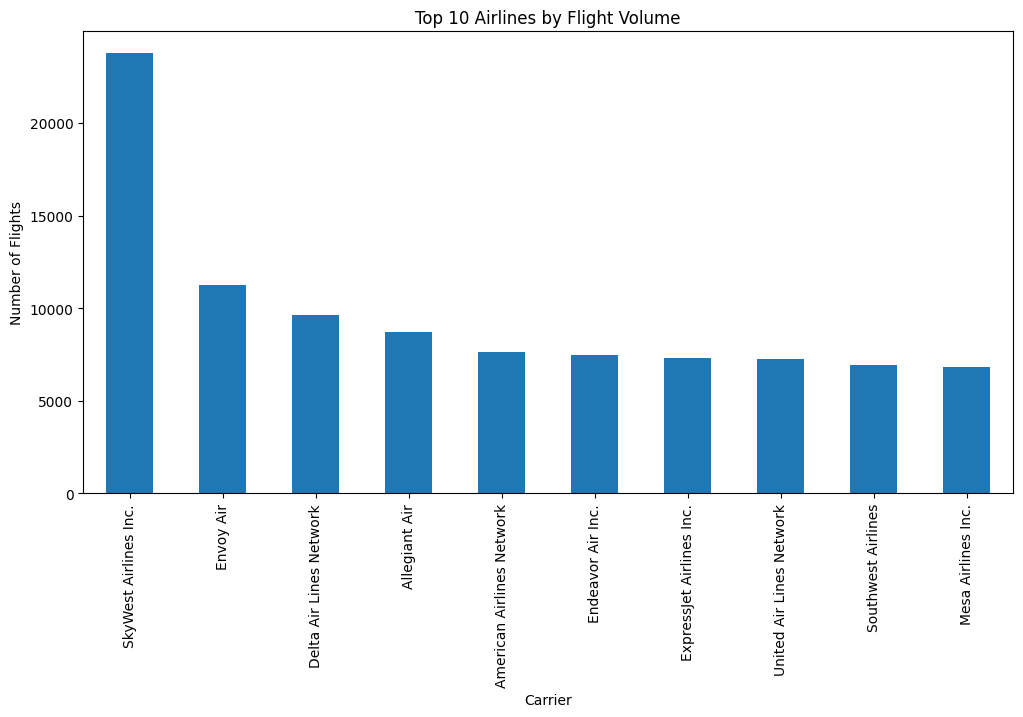

In [135]:
# 1. Flight Volume Overview

## Top Airlines by Flight Volume
plt.figure(figsize=(12,6))
df['carrier_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Airlines by Flight Volume')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.show()

#Insight: SkyWest Airlines Inc. operates the highest number of flights among the top 10 airlines by volume.

C:\Users\Lakshya Gupta\AppData\Local\Temp\ipykernel_35064\1051290149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette='cubehelix')


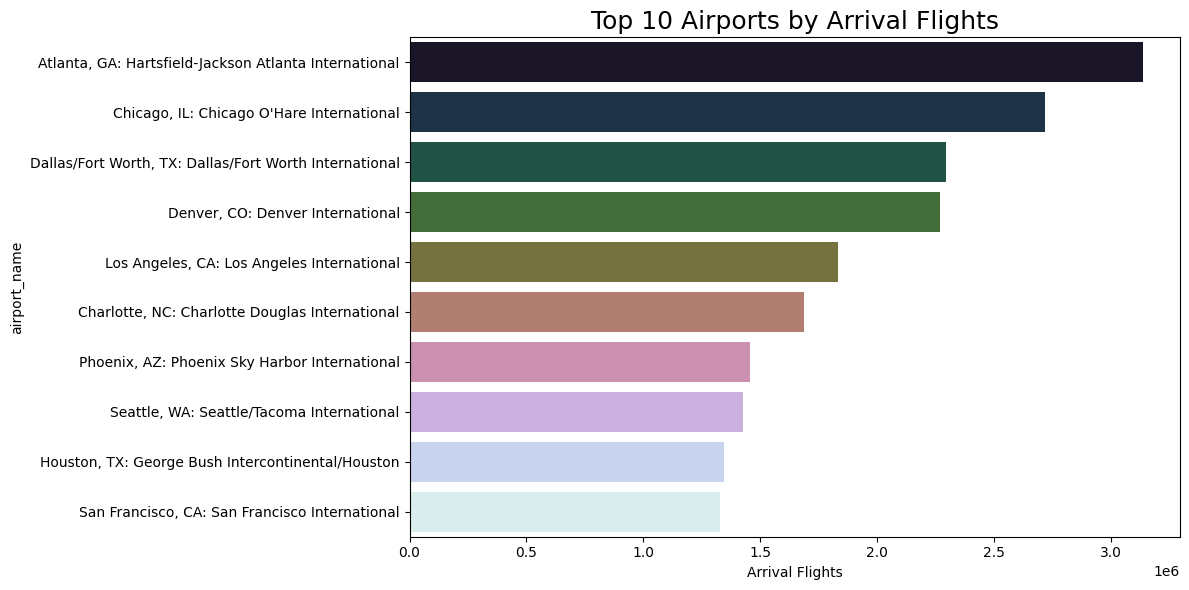

In [136]:
## Top Airports by Flight Volume

top_airports = df.groupby('airport_name')['arr_flights'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='cubehelix')
plt.title('Top 10 Airports by Arrival Flights', fontsize=18)
plt.xlabel('Arrival Flights')
plt.tight_layout()
plt.show()

#Insight: Atlanta's Hartsfield-Jackson Airport handles the highest number of arrival flights among the top 10 U.S. airports.

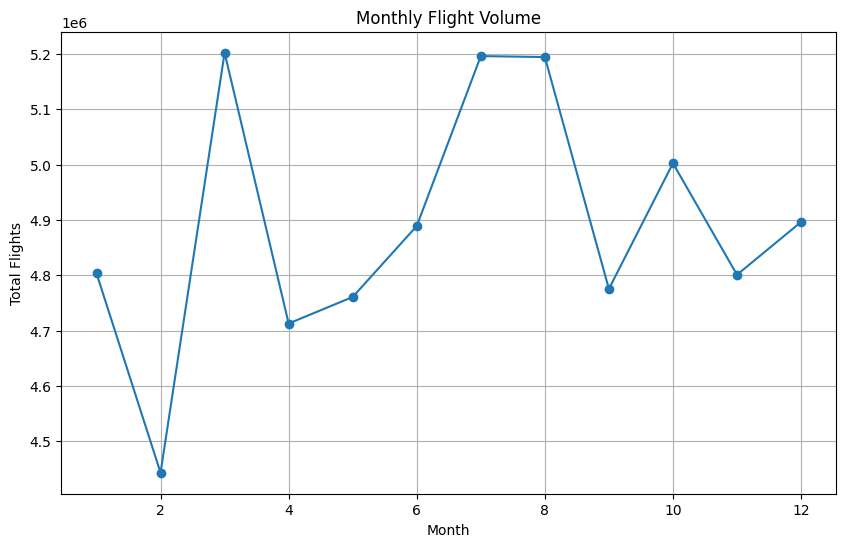

In [14]:
## Monthly Flight Volume
monthly_flights = df.groupby('month')['arr_flights'].sum()
monthly_flights.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Monthly Flight Volume')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.grid()
plt.show()

#Insight: Flight volume peaks in March, July, and August, while February records the lowest number of flights.

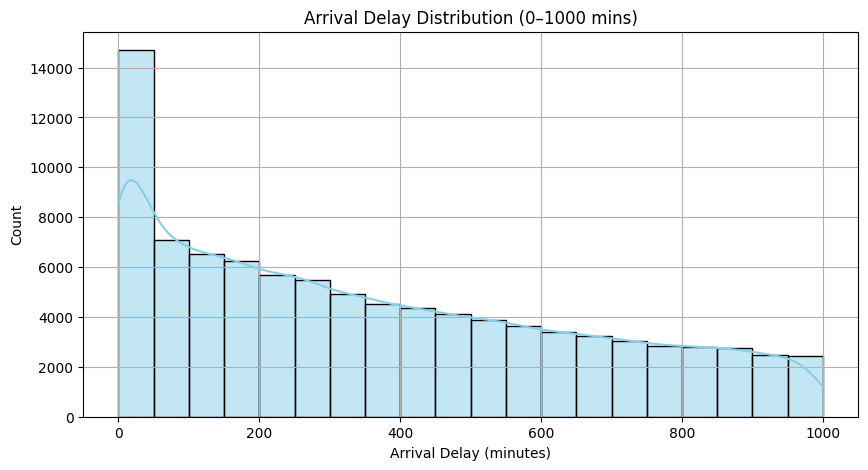

In [134]:
# 2. Delay Overview

## Distribution of Arrival Delay
filtered_df = df[df['arr_delay'] <= 1000]

plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['arr_delay'], bins=np.arange(0, 1000+50, 50), kde=True, color='skyblue')
plt.title('Arrival Delay Distribution (0–1000 mins)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

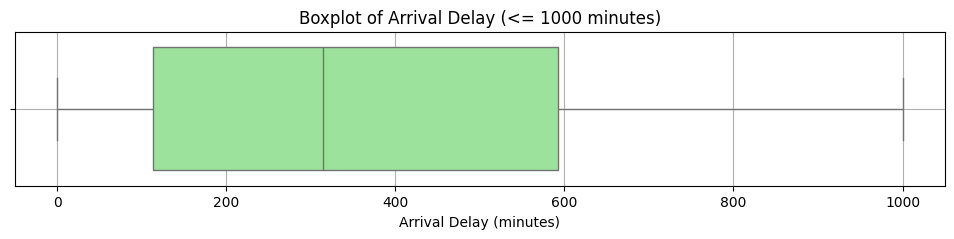

In [16]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=filtered_df['arr_delay'], color='lightgreen')
plt.title('Boxplot of Arrival Delay (<= 1000 minutes)')
plt.xlabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

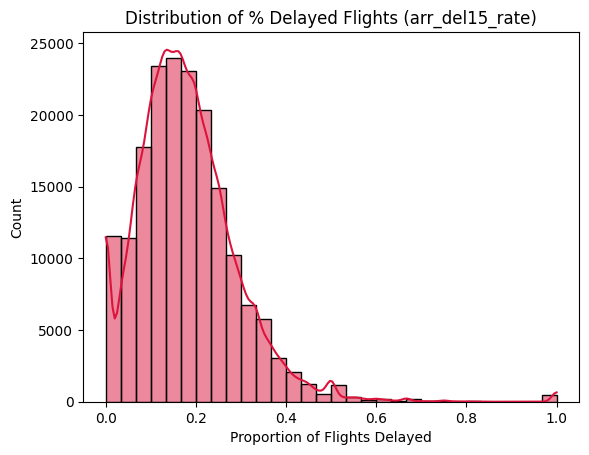

In [17]:
## Distribution of Delayed Flight Proportion
df['arr_del15_rate'] = df['arr_del15'] / df['arr_flights']
sns.histplot(df['arr_del15_rate'], bins=30, kde=True, color='crimson')
plt.title('Distribution of % Delayed Flights (arr_del15_rate)')
plt.xlabel('Proportion of Flights Delayed')
plt.show()

#Insight: Most flights experience a low delay rate, with the majority having less than 30% of flights delayed.

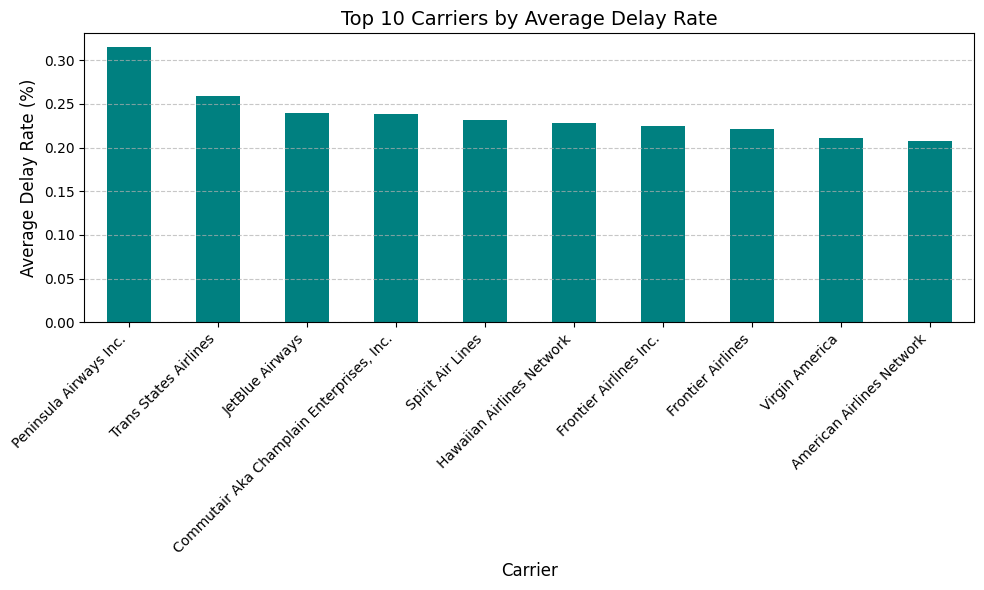

In [18]:
# Group by carrier and get average delay rate
carrier_delay_rate = df.groupby('carrier_name')['arr_del15_rate'].mean().sort_values(ascending=False).head(10)

# Plotting
carrier_delay_rate.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Top 10 Carriers by Average Delay Rate', fontsize=14)
plt.ylabel('Average Delay Rate (%)', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Insight: Peninsula Airways Inc. has the highest average delay rate (>30%), significantly exceeding other carriers, indicating potential operational or regional challenges.

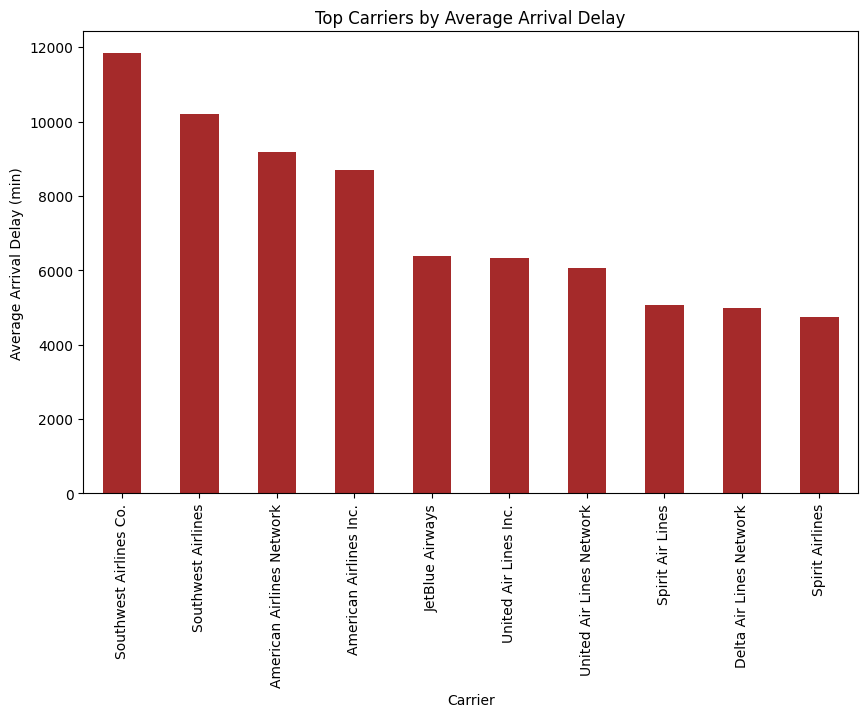

In [118]:
## Mean Arrival Delay by Airline
carrier_arr_delay = df.groupby('carrier_name')['arr_delay'].mean().sort_values(ascending=False).head(10)
carrier_arr_delay.plot(kind='bar', figsize=(10,6), color='brown')
plt.title('Top Carriers by Average Arrival Delay')
plt.ylabel('Average Arrival Delay (min)')
plt.xlabel('Carrier')
plt.show()

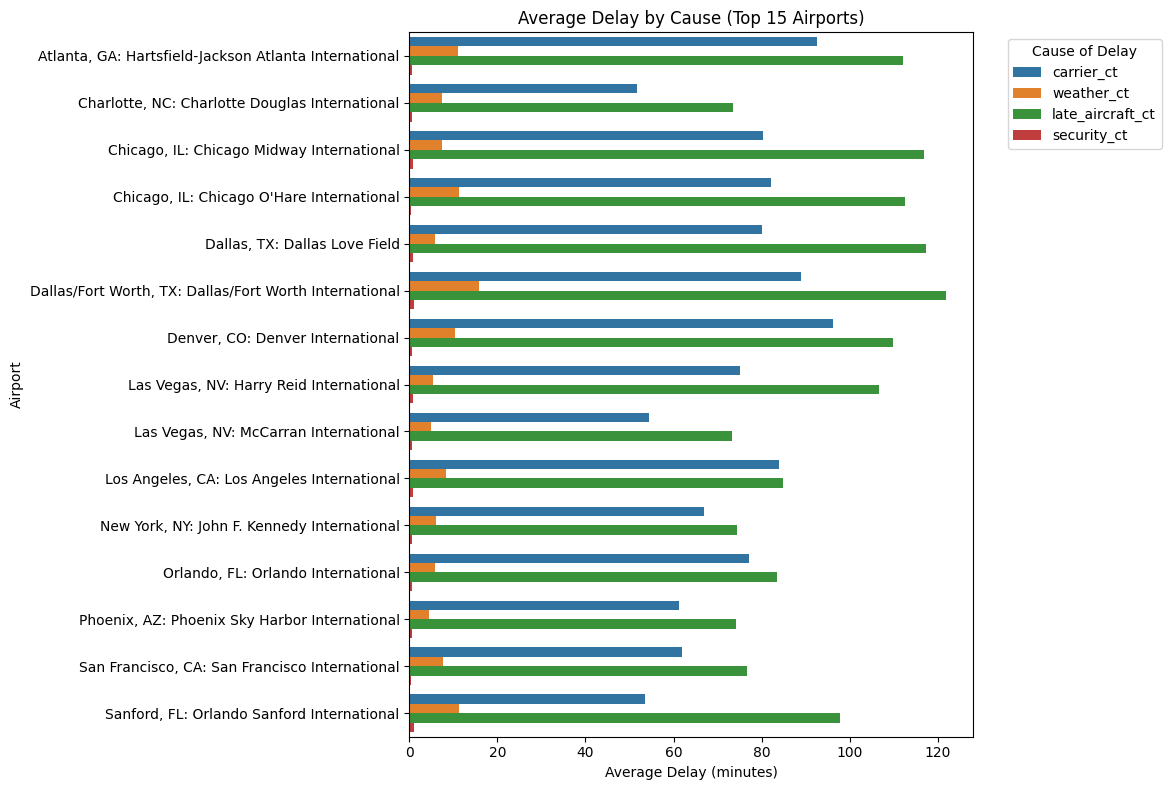

In [20]:
delay_columns = ['carrier_ct', 'weather_ct', 'late_aircraft_ct', 'security_ct']

# Calculate total average delay per airport (sum of all causes)
df['total_avg_delay'] = df[delay_columns].sum(axis=1)
top_airports = df.groupby('airport_name')['total_avg_delay'].mean().nlargest(15).index

# Filter top airports
data_top = df[df['airport_name'].isin(top_airports)]

# Group and reshape
avg_delays = data_top.groupby('airport_name')[delay_columns].mean().reset_index()
avg_delays_melted = avg_delays.melt(id_vars='airport_name', var_name='Delay Cause', value_name='Average Delay (min)')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_delays_melted, y='airport_name', x='Average Delay (min)', hue='Delay Cause')
plt.title('Average Delay by Cause (Top 15 Airports)')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airport')
plt.legend(title='Cause of Delay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Insight: Late aircraft delays consistently cause the highest average delay across major airports, emphasizing their widespread operational impact.

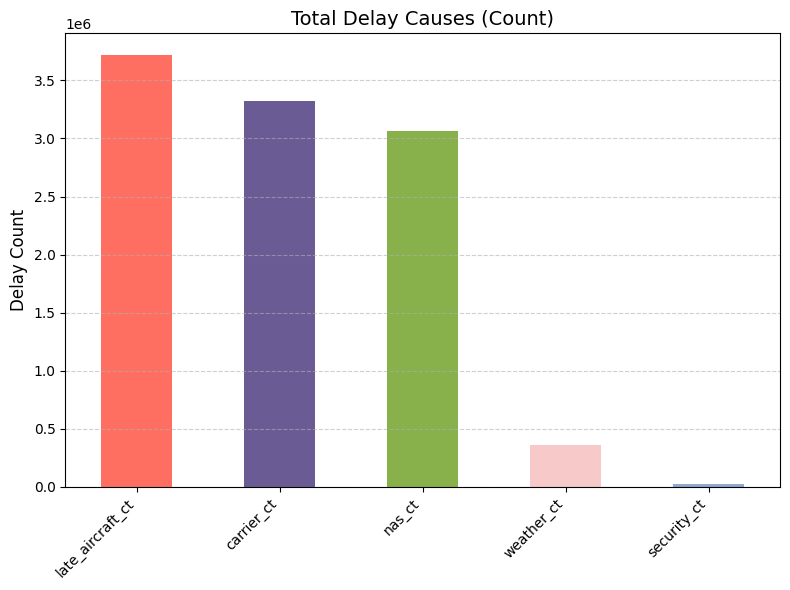

In [124]:
# 3. Delay Cause Analysis

## Total Delay Causes Count
cause_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
total_delay_causes = df[cause_cols].sum().sort_values(ascending=False)
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
total_delay_causes.plot(kind='bar', color=colors, figsize=(8, 6))
plt.title('Total Delay Causes (Count)', fontsize=14)
plt.ylabel('Delay Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# #Insight: Late aircraft is the leading cause of delays, followed closely by carrier-related and NAS delays, while weather and security contribute minimally.

C:\Users\Lakshya Gupta\AppData\Local\Temp\ipykernel_35064\3897704126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cause', y='Delay Minutes', data=delay_melt, palette='rainbow')


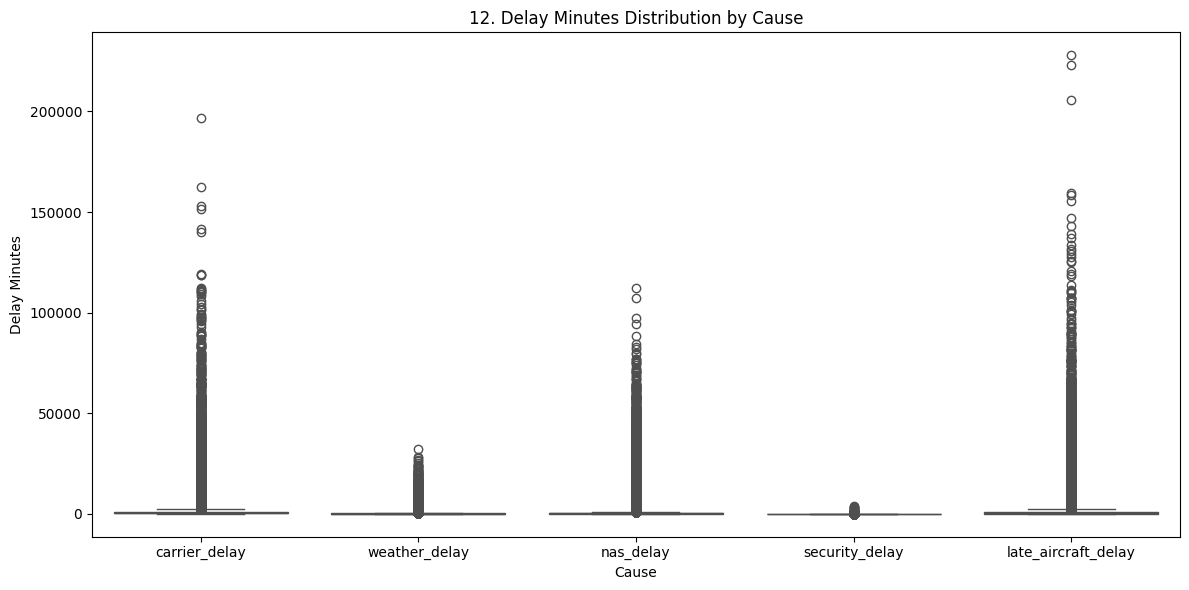

In [35]:
## Distribution of Delay by Cause (Boxplot)
delay_df = df[delay_minutes_cols].copy()
delay_melt = delay_df.melt(var_name='Cause', value_name='Delay Minutes')

plt.figure(figsize=(12,6))
sns.boxplot(x='Cause', y='Delay Minutes', data=delay_melt, palette='rainbow')
plt.title('12. Delay Minutes Distribution by Cause')
plt.tight_layout()
plt.show()

#Insight: Late aircraft and carrier delays have the highest variability and extreme outliers in delay minutes, indicating they can cause significantly longer disruptions.

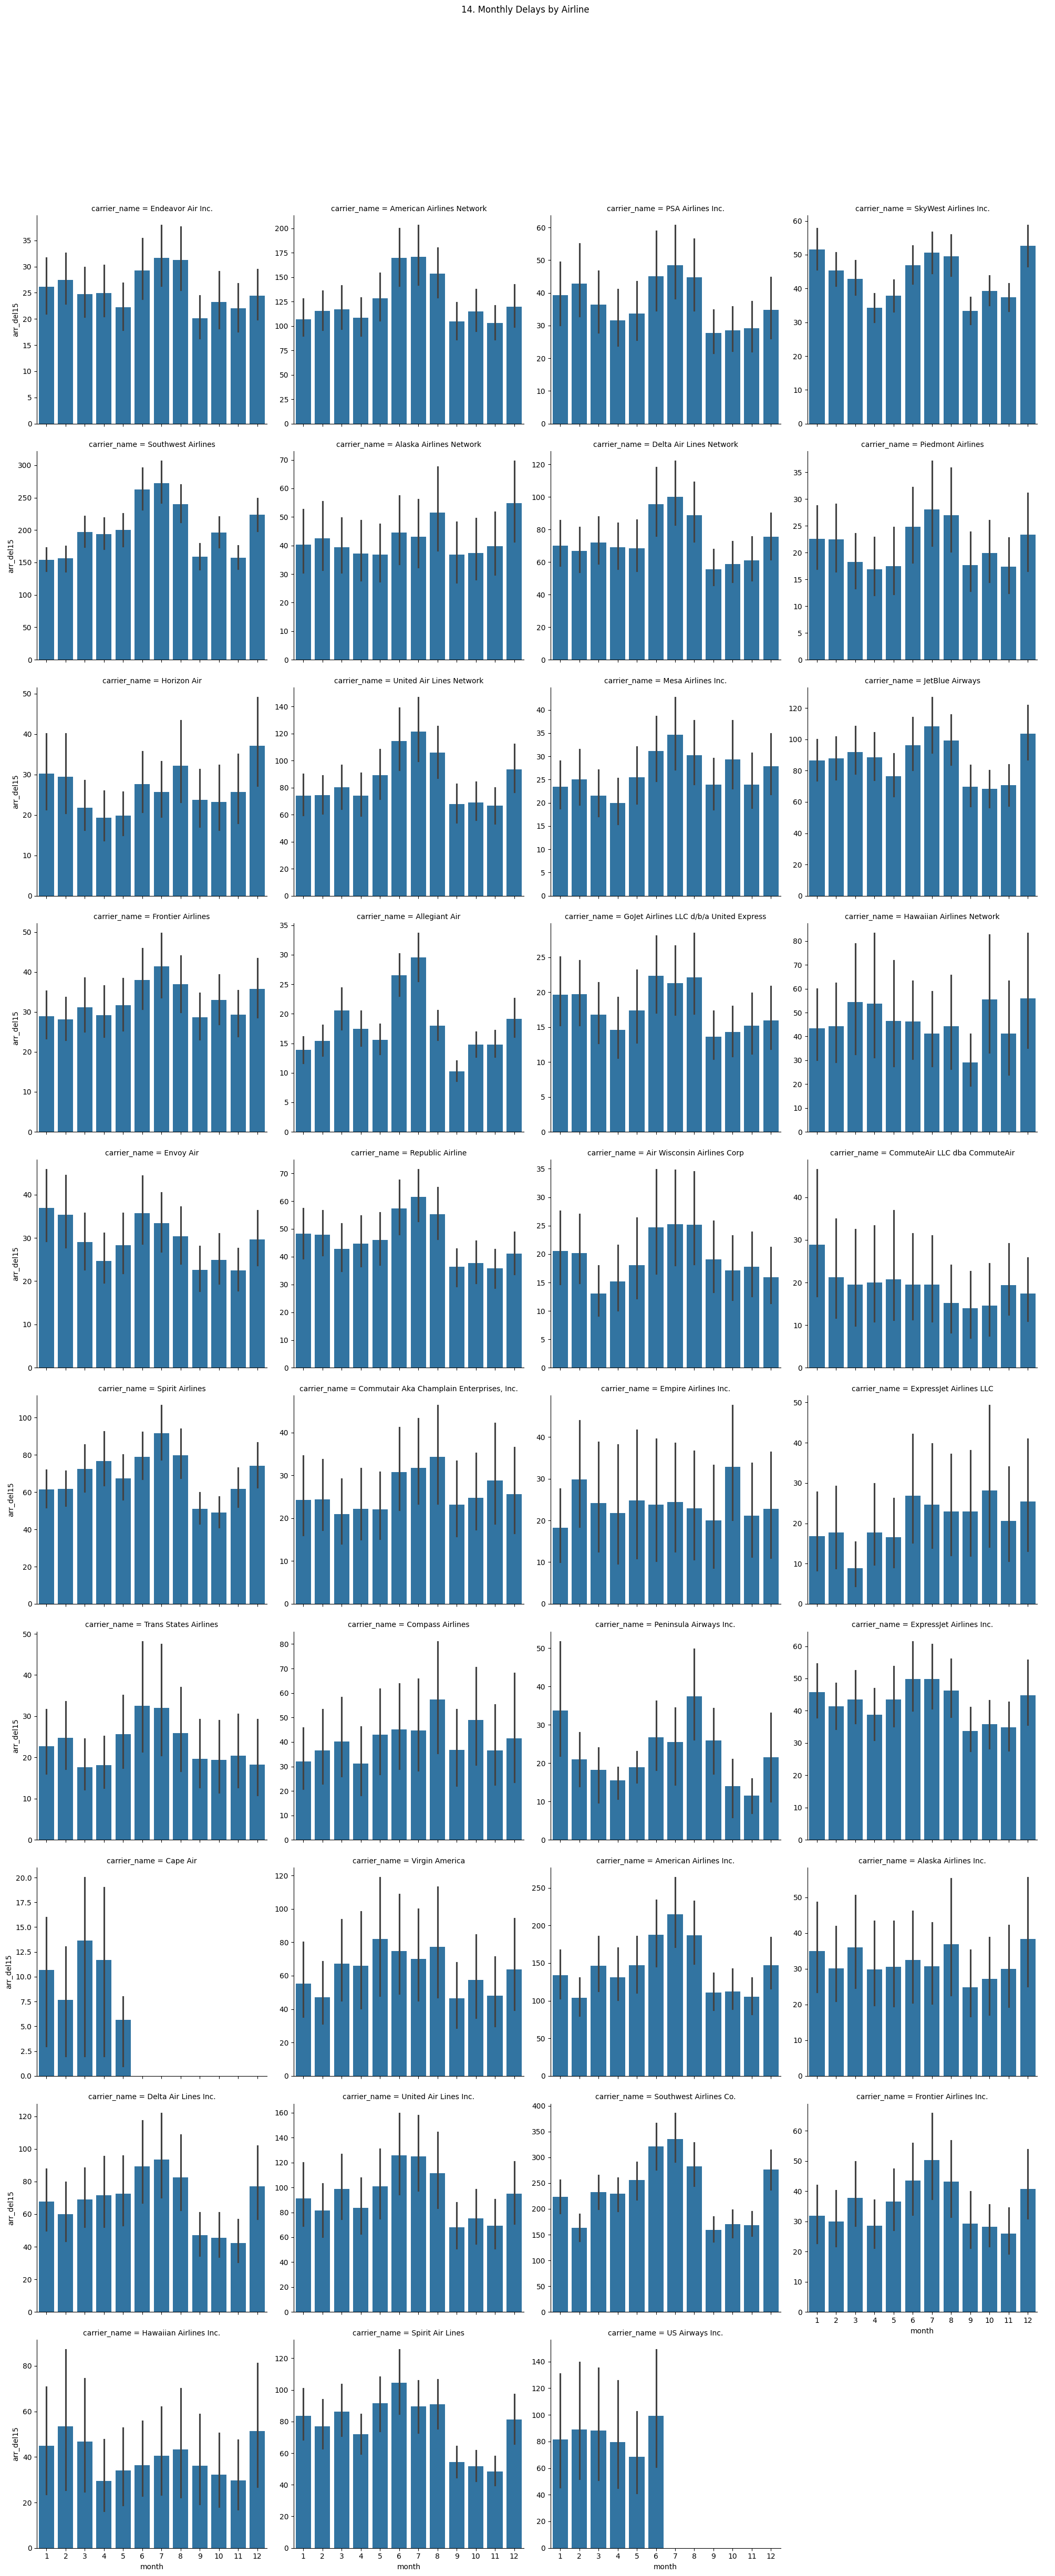

In [36]:
sns.catplot(data=df, x='month', y='arr_del15', col='carrier_name', col_wrap=4, kind='bar', sharey=False)
plt.subplots_adjust(top=0.9)
plt.suptitle('14. Monthly Delays by Airline')
plt.show()

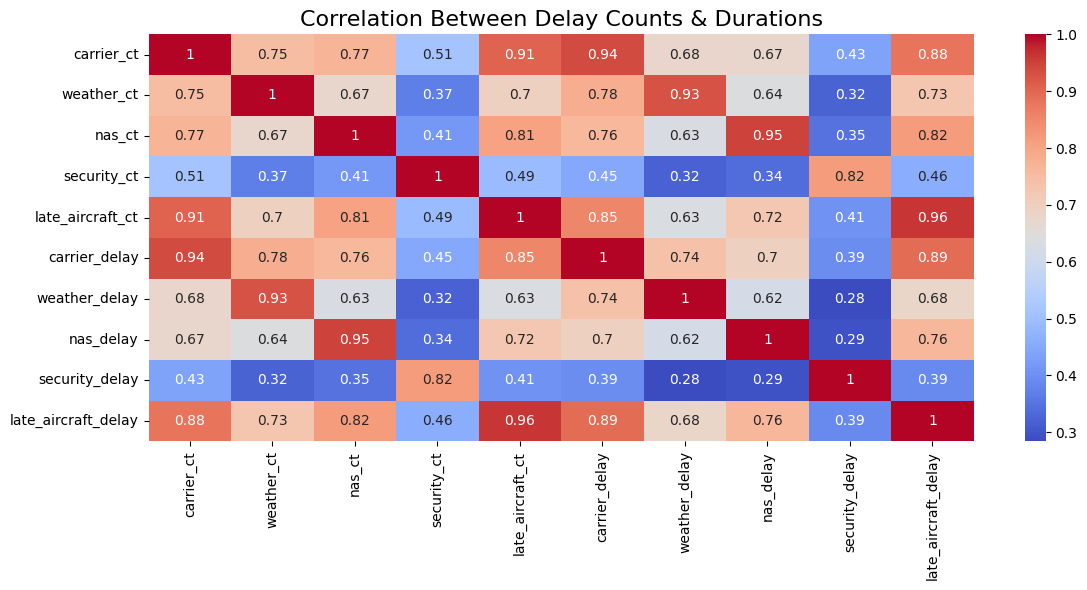

In [37]:
## Correlation Matrix for Causes
plt.figure(figsize=(12,6))
sns.heatmap(df[cause_cols + delay_minutes_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Delay Counts & Durations', fontsize=16)
plt.tight_layout()
plt.show()

#Insight: Carrier and late aircraft delays show the strongest positive correlations with both delay counts and durations, indicating they are key contributors to overall delays.

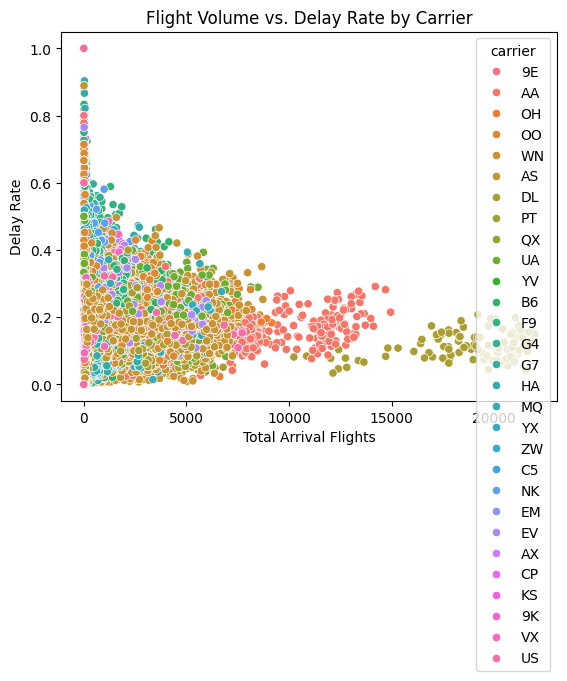

In [137]:
#  4. Airline-Specific Analysis

## Flights vs. % Delayed
sns.scatterplot(x='arr_flights', y='arr_del15_rate', hue='carrier', data=df)
plt.title('Flight Volume vs. Delay Rate by Carrier')
plt.xlabel('Total Arrival Flights')
plt.ylabel('Delay Rate')
plt.show()

#Insight: Carriers with higher flight volumes generally maintain lower delay rates, suggesting more efficient operations at scale.

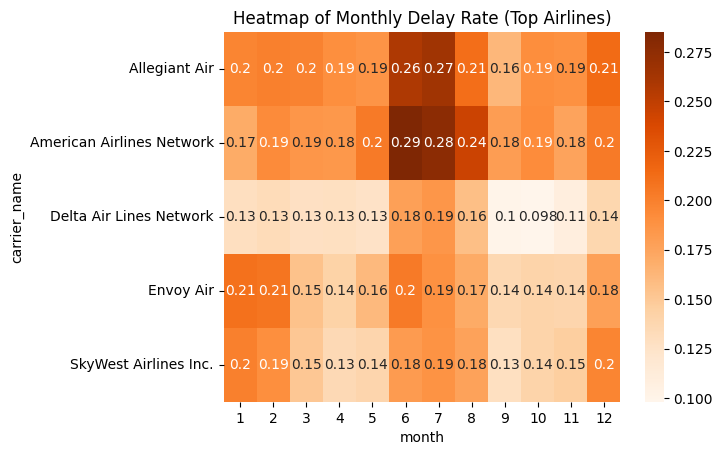

In [126]:
## Monthly Delays Heatmap (Top Airlines)
top_airlines = df['carrier_name'].value_counts().nlargest(5).index
top_df = df[df['carrier_name'].isin(top_airlines)]
pivot = top_df.pivot_table(index='carrier_name', columns='month', values='arr_del15_rate', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='Oranges')
plt.title('Heatmap of Monthly Delay Rate (Top Airlines)')
plt.show()

#Insight: American Airlines Network and Allegiant Air show the highest delay rates, especially in summer months (June–August), indicating seasonal operational challenges.

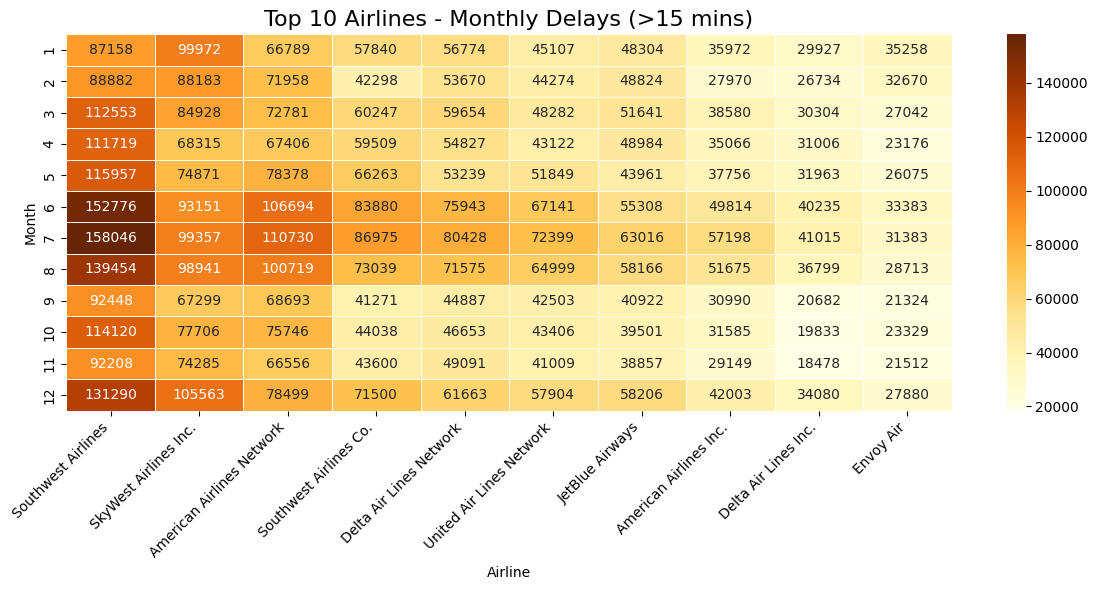

In [41]:
# Filter top 10 airlines with most delays
monthly_airline = df.pivot_table(index='month', 
                                 columns='carrier_name', 
                                 values='arr_del15', 
                                 aggfunc='sum')

top_airlines = monthly_airline.sum().sort_values(ascending=False).head(10).index
monthly_airline_top = monthly_airline[top_airlines]

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_airline_top, cmap='YlOrBr', linewidths=.5, annot=True, fmt='g')
plt.title('Top 10 Airlines - Monthly Delays (>15 mins)', fontsize=16)
plt.xlabel('Airline')
plt.ylabel('Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Insight: Southwest Airlines experienced the highest number of monthly delays over 15 minutes, peaking in December and July.

C:\Users\Lakshya Gupta\AppData\Local\Temp\ipykernel_35064\3666997589.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_delay_top['% Delayed'], y=airport_delay_top.index, palette='coolwarm')


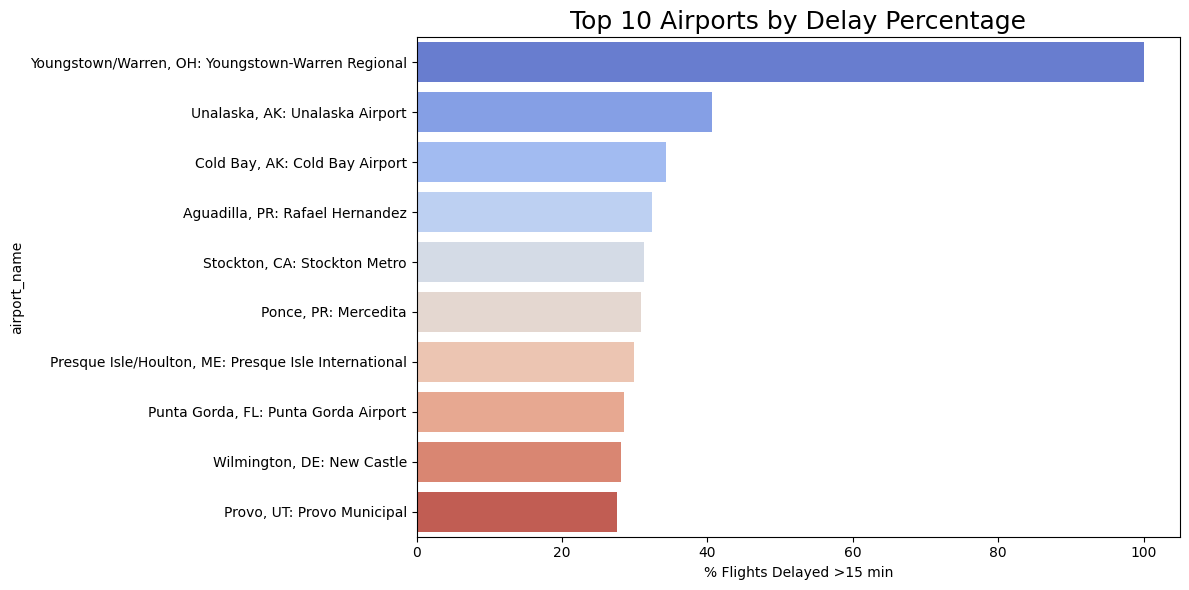

In [106]:
# 🟥 5. Airport-Specific Analysis

## Top Airports by Delay Rate
airport_delay = df.groupby('airport_name')[['arr_flights', 'arr_del15']].sum()
airport_delay['% Delayed'] = 100 * airport_delay['arr_del15'] / airport_delay['arr_flights']
airport_delay_top = airport_delay.sort_values('% Delayed', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=airport_delay_top['% Delayed'], y=airport_delay_top.index, palette='coolwarm')
plt.title('Top 10 Airports by Delay Percentage', fontsize=18)
plt.xlabel('% Flights Delayed >15 min')
plt.tight_layout()
plt.show()

#Insight: Youngstown-Warren Regional Airport has the highest delay percentage, with nearly all flights experiencing delays over 15 minutes.

C:\Users\Lakshya Gupta\AppData\Local\Temp\ipykernel_35064\561108281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_airport.values, y=cancel_airport.index, palette='flare')


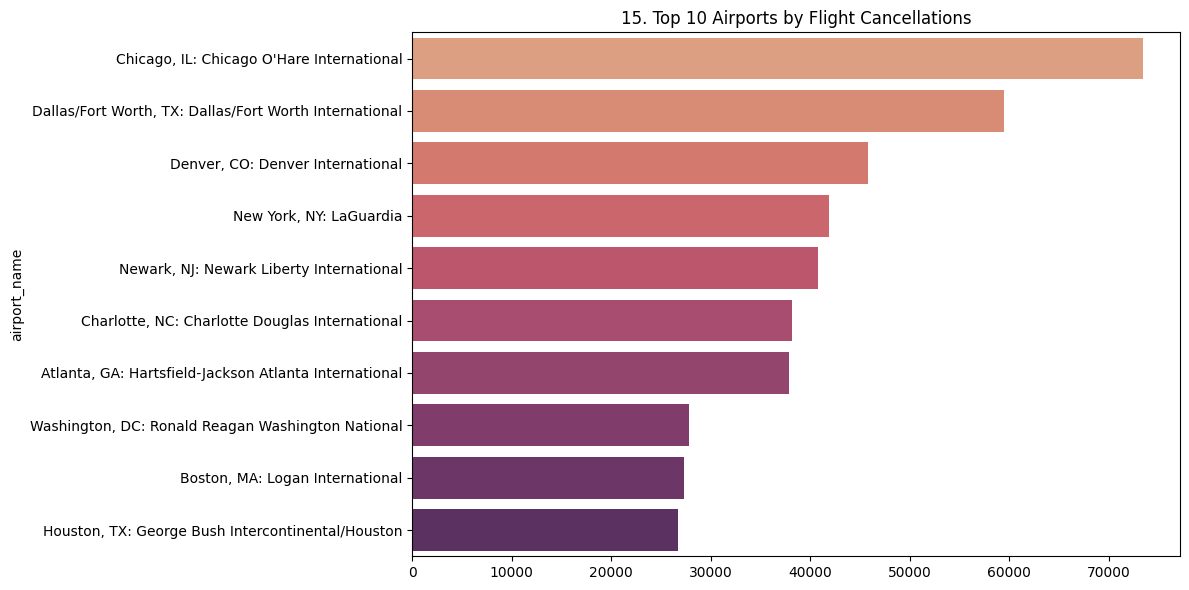

In [43]:
## Cancellations by Airport
cancel_airport = df.groupby('airport_name')['arr_cancelled'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=cancel_airport.values, y=cancel_airport.index, palette='flare')
plt.title('15. Top 10 Airports by Flight Cancellations')
plt.tight_layout()
plt.show()

#Insight: Chicago O’Hare International leads in flight cancellations, significantly surpassing all other top airports in the dataset.

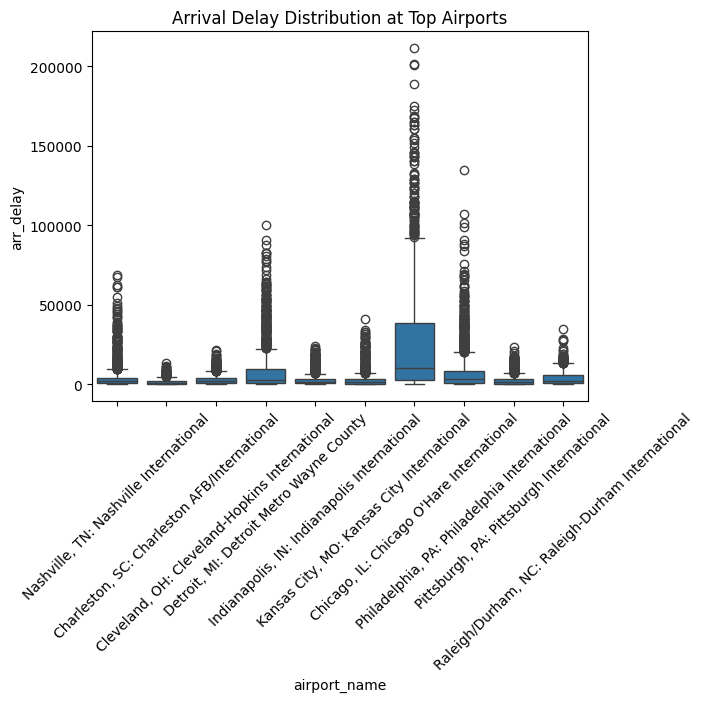

In [44]:
## Delay by Airport (Box)
top_airports = df['airport_name'].value_counts().head(10).index
top_df = df[df['airport_name'].isin(top_airports)]
sns.boxplot(data=top_df, x='airport_name', y='arr_delay')
plt.title('Arrival Delay Distribution at Top Airports')
plt.xticks(rotation=45)
plt.show()

#Insight: Chicago O'Hare International exhibits the widest range and highest outliers in arrival delays, indicating more severe and variable disruptions compared to other top airports.

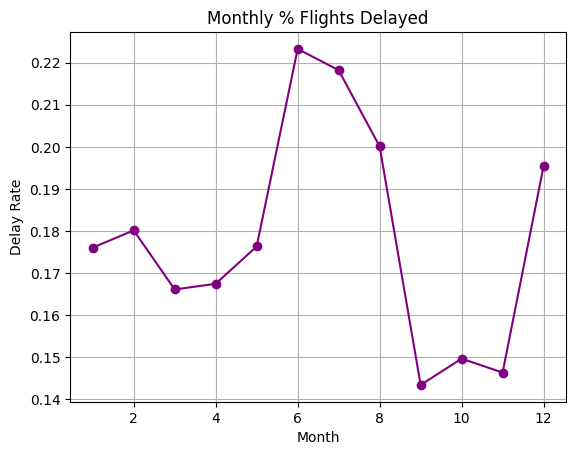

In [45]:
# 🟪 6. Temporal Trends

## Monthly % Delayed
monthly_delayed = df.groupby('month')['arr_del15'].sum() / df.groupby('month')['arr_flights'].sum()
monthly_delayed.plot(kind='line', marker='o', color='purple')
plt.title('Monthly % Flights Delayed')
plt.xlabel('Month')
plt.ylabel('Delay Rate')
plt.grid()
plt.show()

#Insight: The highest percentage of delayed flights occurs in June and July, suggesting peak travel periods or weather issues impact on-time performance.

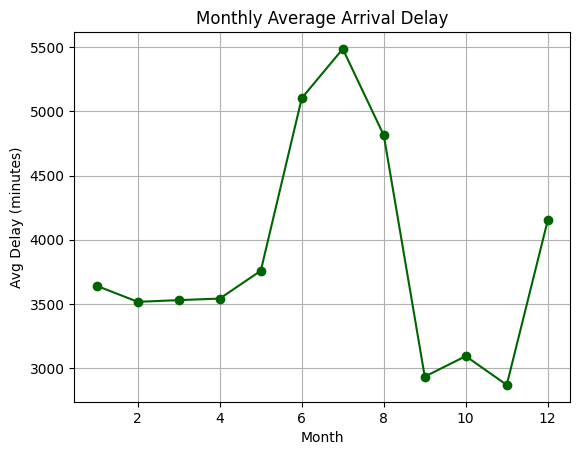

In [46]:
## Monthly Avg Arrival Delay
monthly_avg_delay = df.groupby('month')['arr_delay'].mean()
monthly_avg_delay.plot(kind='line', marker='o', color='darkgreen')
plt.title('Monthly Average Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Avg Delay (minutes)')
plt.grid()
plt.show()

#Insight: Arrival delays peak during the summer months (June–July), indicating seasonal congestion or weather-related disruptions.

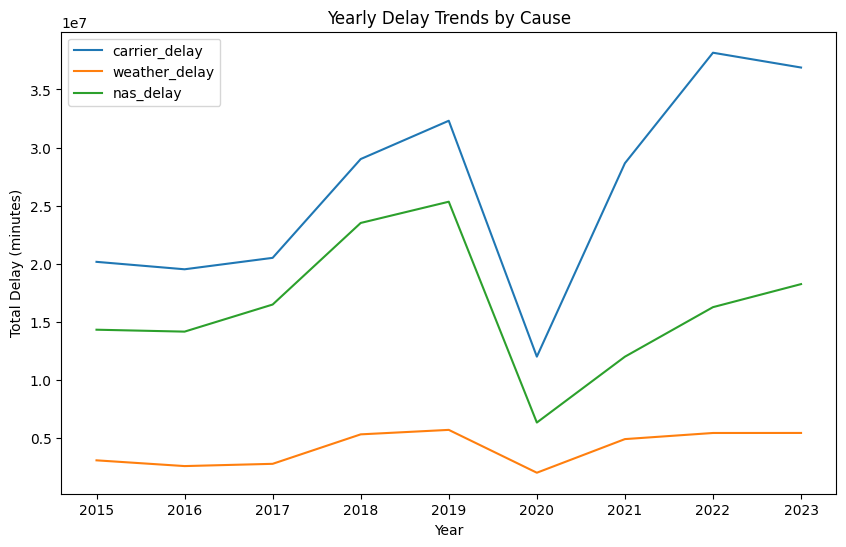

In [47]:
yearly_delays = df.groupby('year')[['carrier_delay', 'weather_delay', 'nas_delay']].sum()

# Plotting a simple line graph
plt.figure(figsize=(10, 6))
for col in yearly_delays.columns:
    plt.plot(yearly_delays.index, yearly_delays[col], label=col)

plt.title('Yearly Delay Trends by Cause')
plt.xlabel('Year')
plt.ylabel('Total Delay (minutes)')
plt.legend()
plt.show()

#Insight: Carrier delays consistently contribute the most to total yearly delays, with a sharp dip in 2020 likely due to reduced flights during the pandemic.

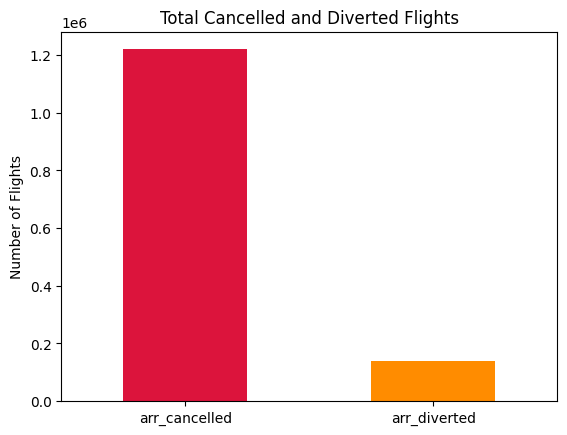

In [48]:
cancel_divert = df[['arr_cancelled', 'arr_diverted']].sum()
cancel_divert.plot(kind='bar', color=['crimson', 'darkorange'])
plt.title("Total Cancelled and Diverted Flights")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)
plt.show()

#Insight: The number of cancelled flights is vastly higher than diverted flights, highlighting cancellations as the dominant disruption in air travel.

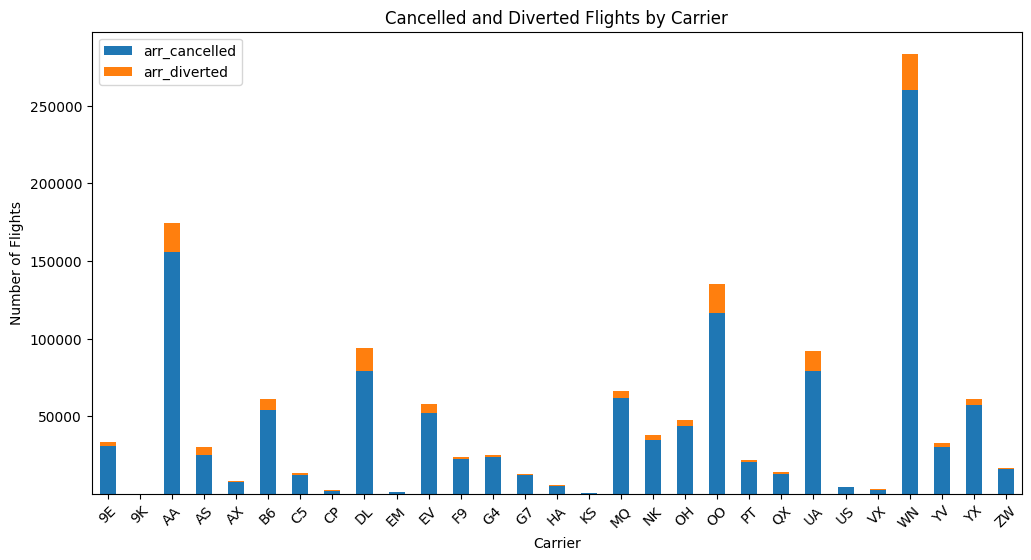

In [117]:
# 🟫 7. Cancellations and Diversions

## Cancellation and Diversion by Carrier
cancel_divert = df.groupby('carrier')[['arr_cancelled', 'arr_diverted']].sum()
cancel_divert.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Cancelled and Diverted Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

#Insight: Carrier 'WN' (Southwest Airlines) shows the highest number of both cancelled and diverted flights, indicating potential operational challenges.

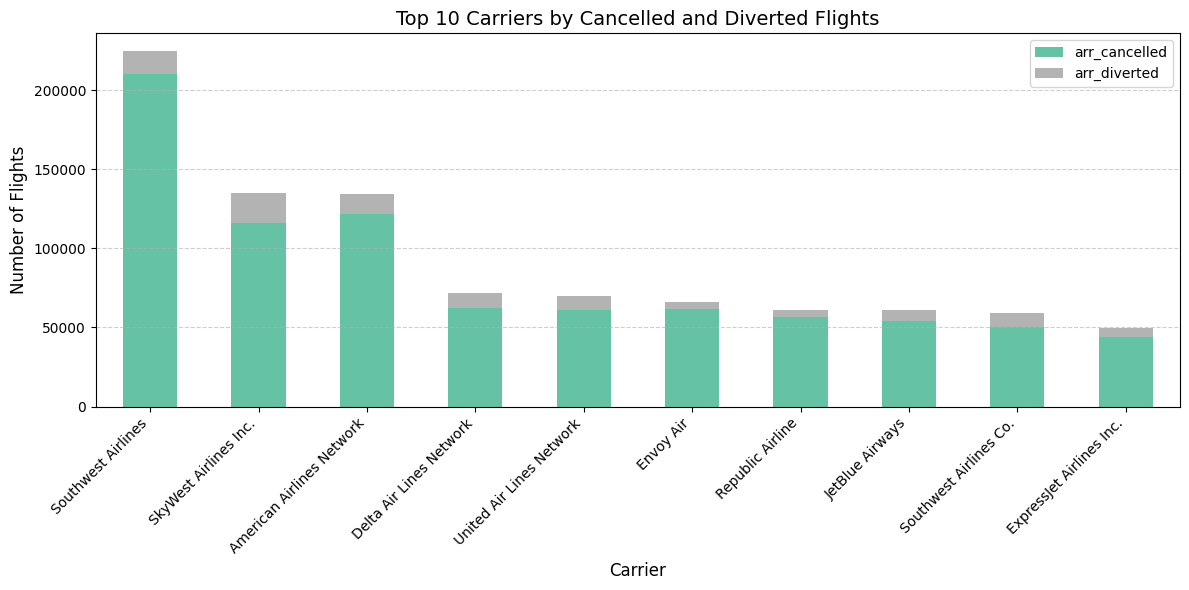

In [111]:
top10_cancel_divert = cancel_divert.assign(total=cancel_divert.sum(axis=1)) \
                                    .sort_values(by='total', ascending=False) \
                                    .drop(columns='total') \
                                    .head(10)

# Plotting
top10_cancel_divert.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Top 10 Carriers by Cancelled and Diverted Flights', fontsize=14)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Insight: Southwest Airlines has the highest number of cancelled and diverted flights, significantly surpassing all other carriers

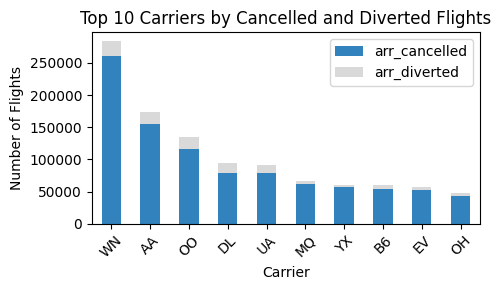

In [120]:
# Group and sum cancelled and diverted flights by carrier
cancel_divert = df.groupby('carrier')[['arr_cancelled', 'arr_diverted']].sum()

# Sort by total (cancelled + diverted) flights and take top 10
cancel_divert['total'] = cancel_divert['arr_cancelled'] + cancel_divert['arr_diverted']
top10_cancel_divert = cancel_divert.sort_values('total', ascending=False).head(10)

# Drop the total column before plotting
top10_cancel_divert.drop(columns='total', inplace=True)

# Plot
top10_cancel_divert.plot(kind='bar', stacked=True, figsize=(5, 3), colormap='tab20c')
plt.title('Top 10 Carriers by Cancelled and Diverted Flights')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


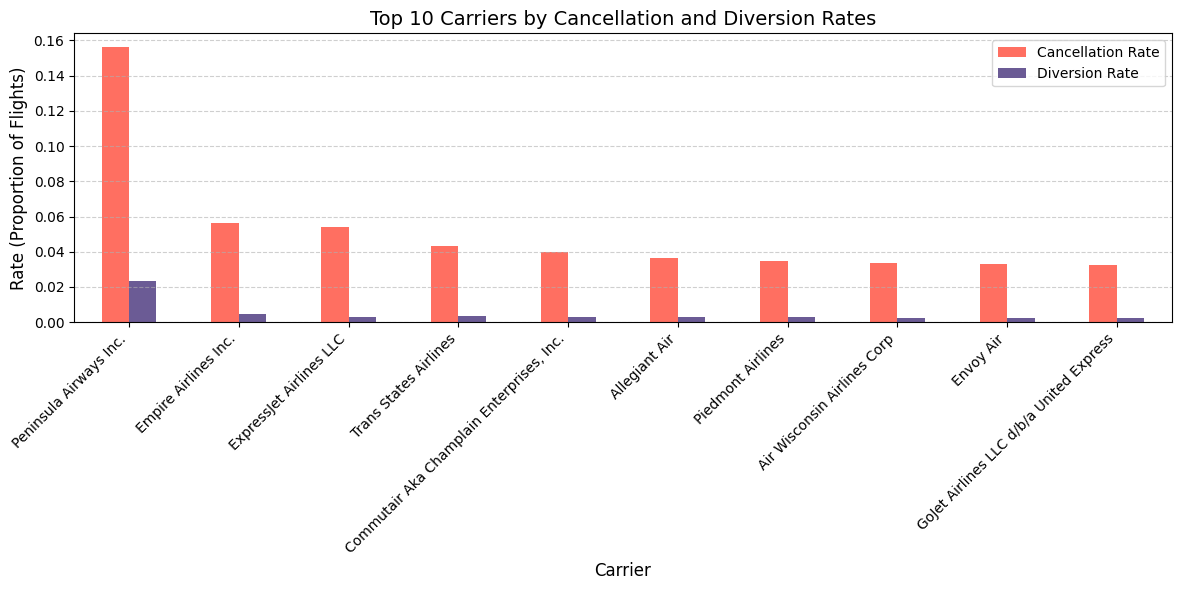

In [121]:
carrier_flights = df.groupby('carrier_name')['arr_flights'].sum()
cancel_divert = df.groupby('carrier_name')[['arr_cancelled', 'arr_diverted']].sum()
cancel_divert_rate = cancel_divert.div(carrier_flights, axis=0)

cancel_divert_rate.rename(columns={
    'arr_cancelled': 'Cancellation Rate',
    'arr_diverted': 'Diversion Rate'
}, inplace=True)

# top 10 carriers with highest combined rates
cancel_divert_rate['total_rate'] = cancel_divert_rate['Cancellation Rate'] + cancel_divert_rate['Diversion Rate']
top10_rates = cancel_divert_rate.sort_values(by='total_rate', ascending=False).drop(columns='total_rate').head(10)

# Plotting
top10_rates.plot(kind='bar', figsize=(12, 6), color=['#FF6F61', '#6B5B95'])
plt.title('Top 10 Carriers by Cancellation and Diversion Rates', fontsize=14)
plt.ylabel('Rate (Proportion of Flights)', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Insight; Peninsula Airways Inc. has the highest cancellation and diversion rates among all carriers, indicating significant operational unreliability.

In [52]:
delay_columns = [
    'arr_delay', 'carrier_delay', 'weather_delay',
    'nas_delay', 'security_delay', 'late_aircraft_delay'
]

In [53]:

#Removing outliers
def remove_outliers_iqr(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            before = df.shape[0]
            df = df[(df[col] >= lower) & (df[col] <= upper)]
            after = df.shape[0]
            print(f"{col}: Removed {before - after} outliers.")
    return df

df_cleaned = remove_outliers_iqr(df, delay_columns)


In [133]:

# === Check shape after cleaning ===
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (178747, 24)
Cleaned shape: (104789, 23)


In [55]:
df_cleaned.to_csv("Airline_Delay_Cause_Cleaned.csv", index=False)

In [56]:
df_new = pd.read_csv("Airline_Delay_Cause_Cleaned.csv")

In [57]:
df_new.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_del15_rate,total_avg_delay
0,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.0,...,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,0.112903,6.00
1,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.0,...,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,0.105263,8.94
2,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.0,...,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,0.086957,2.00
3,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.0,...,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0,0.125000,5.79
4,2023,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",48.0,13.0,5.09,0.0,...,0.0,0.0,910.0,547.0,0.0,286.0,0.0,77.0,0.270833,5.94


In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104789 entries, 0 to 104788
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 104789 non-null  int64  
 1   month                104789 non-null  int64  
 2   carrier              104789 non-null  object 
 3   carrier_name         104789 non-null  object 
 4   airport              104789 non-null  object 
 5   airport_name         104789 non-null  object 
 6   arr_flights          104789 non-null  float64
 7   arr_del15            104789 non-null  float64
 8   carrier_ct           104789 non-null  float64
 9   weather_ct           104789 non-null  float64
 10  nas_ct               104789 non-null  float64
 11  security_ct          104789 non-null  float64
 12  late_aircraft_ct     104789 non-null  float64
 13  arr_cancelled        104789 non-null  float64
 14  arr_diverted         104789 non-null  float64
 15  arr_delay        

In [59]:
df_new['delay_time_per_flight'] = df_new['arr_delay'] / df_new['arr_del15']
df_new.dropna(subset=['delay_time_per_flight'], inplace=True)

In [60]:
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df['dominant_cause'] = df[delay_cols].idxmax(axis=1)

In [132]:
df_new['delay_ratio_per_flight'] = df_new['arr_del15'] / df_new['arr_flights']
df_new.dropna(subset=['delay_ratio_per_flight'], inplace=True)

In [62]:
OAI_WEIGHTS = {
    'carrier_delay': 3.0,
    'late_aircraft_delay': 2.5,
    'nas_delay': 1.0,
    'security_delay': 1.0,
    'weather_delay': 0.5
}

In [139]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df_new['season'] = df_new['month'].apply(get_season)

In [142]:
#Encoding(convert alphabhet into numerical)
data2_encoded = pd.get_dummies(df_new, columns=['carrier', 'airport','season'],
                               drop_first=True, dtype=int)

# Make sure to drop any remaining object (string) columns like 'carrier_name', 'airport_name', etc.
data2_encoded = data2_encoded.select_dtypes(include=[np.number])


In [143]:
feature_columns = ['arr_flights', 'year', 'month'] + \
    [col for col in data2_encoded.columns if col.startswith('carrier_') or col.startswith('airport_') or col.startswith('season_')]

# Feature matrix and target vector
X = data2_encoded[feature_columns]
y = df_new['delay_time_per_flight']

In [144]:



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_indices = X_test.index


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [145]:
y_pred = model.predict(X_test_scaled)
df_test = df_new.loc[test_indices].copy()

df_test['y_true'] = y_test
df_test['y_pred'] = y_pred
df_test['dominant_cause'] = df_test[delay_cols].idxmax(axis=1)
df_test['weight'] = df_test['dominant_cause'].map(OAI_WEIGHTS).fillna(1.0)
df_test['weighted_error'] = df_test['weight'] * np.abs(df_test['y_true'] - df_test['y_pred'])

In [146]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
oai_score = df_test['weighted_error'].mean()

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score (Accuracy): {r2:.2f}")
print(f"🔧 OAI Score: {oai_score:.2f}")

RMSE: 21.66
MAE: 12.22
R² Score (Accuracy): 0.63
🔧 OAI Score: 29.92


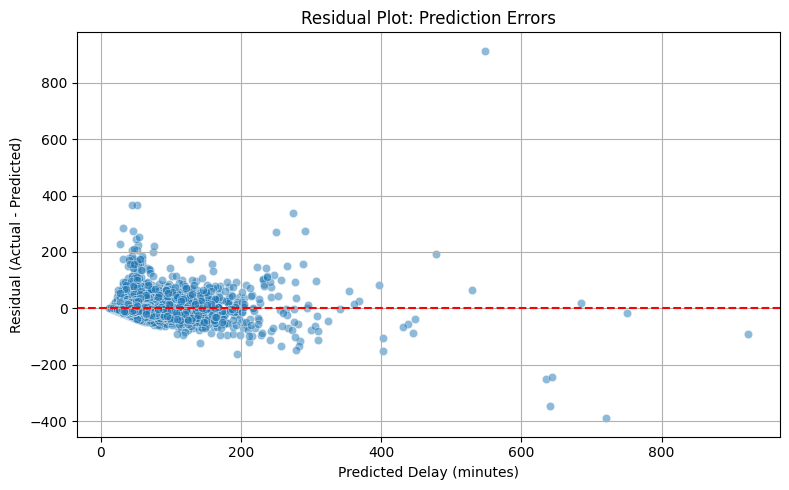

In [147]:
import seaborn as sns

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Delay (minutes)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot: Prediction Errors")
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\Lakshya Gupta\AppData\Local\Temp\ipykernel_35064\398228798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=oai_cause_impact.index, y=oai_cause_impact.values, palette='coolwarm')
C:\Users\Lakshya Gupta\AppData\Local\Temp\ipykernel_35064\398228798.py:10: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


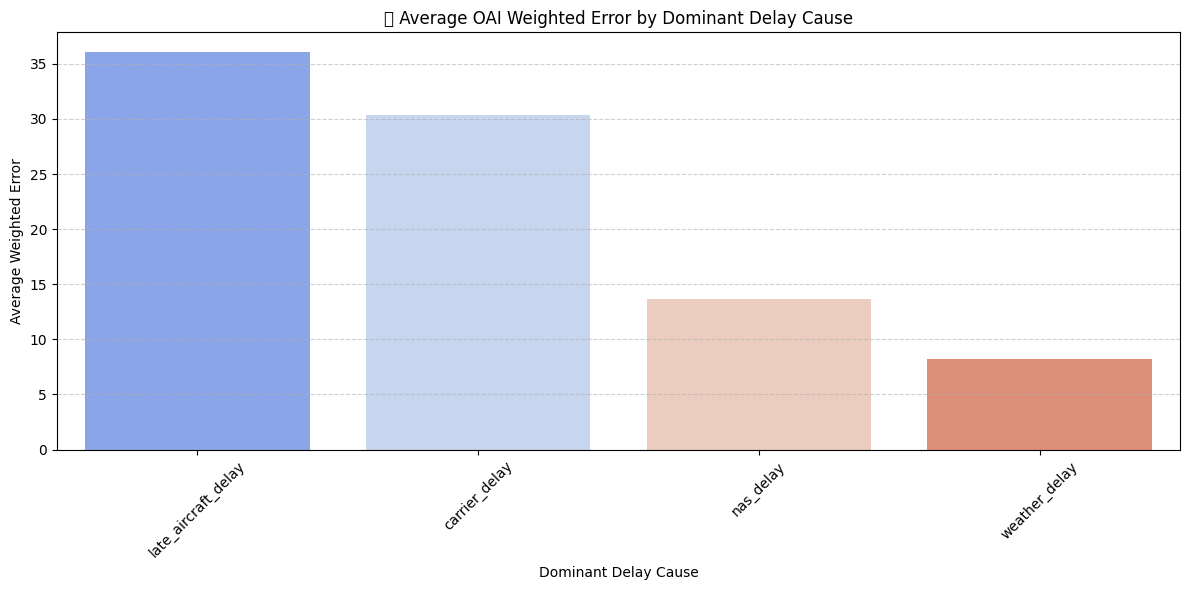

In [148]:
oai_cause_impact = df_test.groupby('dominant_cause')['weighted_error'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=oai_cause_impact.index, y=oai_cause_impact.values, palette='coolwarm')
plt.title('🔧 Average OAI Weighted Error by Dominant Delay Cause')
plt.xlabel('Dominant Delay Cause')
plt.ylabel('Average Weighted Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

In [150]:
threshold = 0.15
data2_encoded['high_delay_ratio'] = (data2_encoded['delay_ratio_per_flight'] > threshold).astype(int)

Min/Max of y_test: 15.0 1461.0
Min/Max of y_pred: 11.865355 923.47644


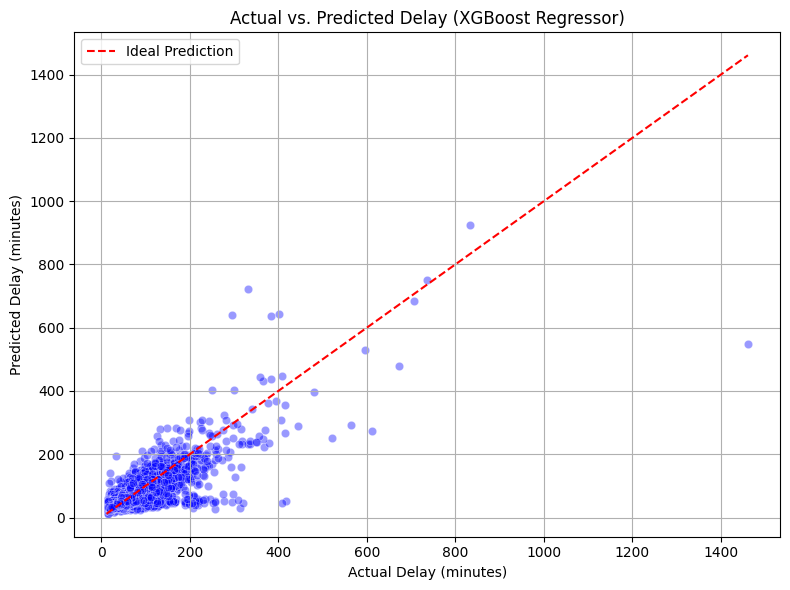

In [151]:

# Optional: ensure your y_test and y_pred are not scaled/binarized
print("Min/Max of y_test:", y_test.min(), y_test.max())
print("Min/Max of y_pred:", y_pred.min(), y_pred.max())

# Plot: Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='blue')

# Line: Ideal prediction (y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--r', label='Ideal Prediction')

# Labels and aesthetics
plt.xlabel("Actual Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("Actual vs. Predicted Delay (XGBoost Regressor)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [152]:

data2_encoded['high_delay_ratio'] = (data2_encoded['delay_ratio_per_flight'] > threshold).astype(int)
X_cls = data2_encoded[feature_columns]
y_cls = data2_encoded['high_delay_ratio']
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000)
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [74]:
log_grid = GridSearchCV(log_model, log_params, cv=3, scoring='f1', n_jobs=-1)
log_grid.fit(X_train_scaled, y_train)

best_log_model = log_grid.best_estimator_
y_pred_log = best_log_model.predict(X_test_scaled)

print("\n🔹 Logistic Regression Results")
print("Best Params:", log_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


🔹 Logistic Regression Results
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.7773802115743622
Precision: 0.7633645261912445
Recall   : 0.7722524483133841
F1 Score : 0.7677827662681884
Confusion Matrix:
 [[7894 2200]
 [2093 7097]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79     10094
           1       0.76      0.77      0.77      9190

    accuracy                           0.78     19284
   macro avg       0.78      0.78      0.78     19284
weighted avg       0.78      0.78      0.78     19284



In [75]:
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [76]:
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

print("\n🔹 Random Forest Results")
print("Best Params:", rf_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy : 0.8205247873885086
Precision: 0.82138449455851
Recall   : 0.7966267682263329
F1 Score : 0.8088162183063581
Confusion Matrix:
 [[8502 1592]
 [1869 7321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     10094
           1       0.82      0.80      0.81      9190

    accuracy                           0.82     19284
   macro avg       0.82      0.82      0.82     19284
weighted avg       0.82      0.82      0.82     19284



In [163]:
xgb_model = XGBClassifier(random_state=42, verbosity=0)
xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

In [91]:
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='f1', n_jobs=-1)
xgb_grid.fit(X_train_scaled, y_train)

best_xgb_model = xgb_grid.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

print("\n🔹 XGBoost Results")
print("Best Params:", xgb_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "C:\Users\Lakshya Gupta\AppData\Roaming\Python\Python313\s


🔹 XGBoost Results
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy : 0.8133167392657125
Precision: 0.8233456732993985
Recall   : 0.7744287268770402
F1 Score : 0.7981383873500056
Confusion Matrix:
 [[8567 1527]
 [2073 7117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     10094
           1       0.82      0.77      0.80      9190

    accuracy                           0.81     19284
   macro avg       0.81      0.81      0.81     19284
weighted avg       0.81      0.81      0.81     19284



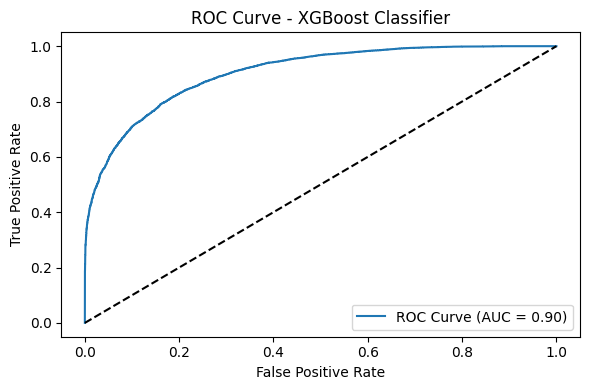

In [92]:
from sklearn.metrics import roc_curve, auc

y_proba = best_xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier")
plt.legend()
plt.tight_layout()
plt.show()


In [128]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

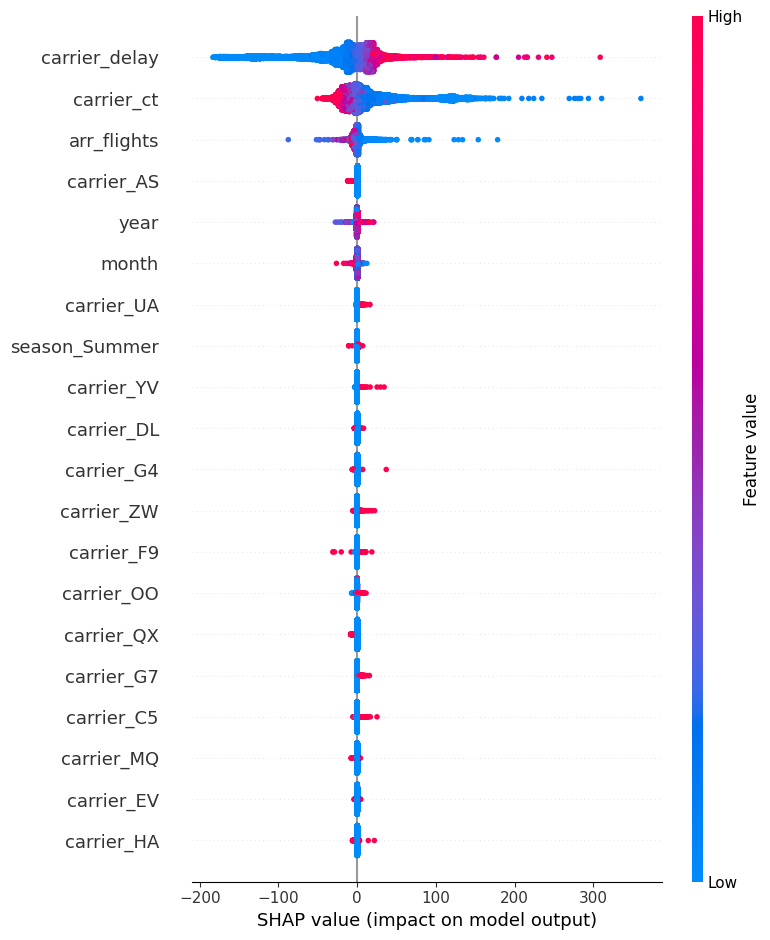

In [81]:

shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)

In [127]:
shap_df = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

print(" Top Features Contributing to Delay:")
print(shap_df.head(10))

 Top Features Contributing to Delay:
           feature  mean_abs_shap
4    carrier_delay      31.123833
3       carrier_ct      26.545771
0      arr_flights       3.764634
7       carrier_AS       0.799500
1             year       0.716053
2            month       0.491451
26      carrier_UA       0.391461
422  season_Summer       0.387230
30      carrier_YV       0.283389
12      carrier_DL       0.282477
